## Load packages and sample data

In [1]:
import re
import pandas as pd
from typing import List
import matplotlib.pyplot as plt
import sys, os
sys.path.append("\\".join(os.getcwd().split("\\")[:-1]))
from scraper import utils

In [16]:
url_github_repo = "https://github.com/FHNW-IVGI/Geoharvester/blob/main/scraper/data/"
url_github_repo_suffix = "?raw=true"
url_geoservices_CH_csv = "{}geoservices_CH.csv{}".format(url_github_repo,url_github_repo_suffix)
fields_to_include = ["provider","title", "keywords", "abstract", "service", "endpoint", "preview"]

def load_data(rawdata=False):
    if rawdata:
        dataframe = pd.read_csv(url_geoservices_CH_csv, low_memory=False)
    else:
        dataframe = pd.read_csv(url_geoservices_CH_csv, usecols=fields_to_include, low_memory=False)
    return dataframe

dataframe_some_cols = load_data()
database = dataframe_some_cols.fillna("nan")
dataframe_some_cols = load_data(rawdata=True)
database_raw = dataframe_some_cols.fillna("nan")

In [2]:
db = pd.read_csv("./data/geoservices_CH.csv", low_memory=False)
def count(row, exc=0):
    try:
        num = len(str(row).split())
    except TypeError:
        num = exc
    except AttributeError:
        num = exc
    if pd.isna(row):
        num = 0
    return num
db['abstract_w_count'] = db['ABSTRACT'].apply(count)
db['keywords_w_count'] = db['KEYWORDS'].apply(count)
db.replace(['Bund','FL_LI','Geodienste','KT_AG','KT_AI','KT_AR','KT_BE','KT_BL','KT_BS','KT_FR','KT_GE','KT_GL','KT_GR','KT_JU','KT_SG','KT_SH','KT_SO','KT_SZ','KT_TG','KT_TI','KT_UR','KT_VD','KT_ZG','KT_ZH'],
              ['Bund','LI','Geodienste','AG','AI','AR','BE','BL','BS','FR','GE','GL','GR','JU','SG','SH','SO','SZ','TG','TI','UR','VD','ZG','ZH'], inplace=True)
db_nan = db[db['OWNER'] == 'Bund'].isna().sum()

In [47]:
db[(db['OWNER'] == 'AI') & (db['keywords_w_count'] == 1)]

,OWNER,TITLE,NAME,MAPGEO,TREE,GROUP,ABSTRACT,KEYWORDS,LEGEND,CONTACT,SERVICELINK,METADATA,UPDATE,SERVICETYPE,MAX_ZOOM,CENTER_LAT,CENTER_LON,BBOX,abstract_w_count,keywords_w_count
3,AI,Amtliche Vermessung farbig Gde,ch.geoportal.basiskarten_bodenbedeckung_bildda...,https://map.geo.admin.ch/?bgLayer=ch.swisstopo...,KT_AI/WMS Geoportal.ch/ch.geoportal.ktai,ch.geoportal.ktai,Diese Karte zeigt in roter Farbe den pendenten...,AV,https://www.geoportal.ch/services/wms/ktai?req...,NaN,https://www.geoportal.ch/services/wms/ktai,https://metadata.geoportal.ch,NaN,WMS,5,47.34,9.46,9.297 47.225 9.632 47.453,39,1
4,AI,Amtliche Vermessung Gde,ch.geoportal.basiskarten_bodenbedeckung_bildda...,https://map.geo.admin.ch/?bgLayer=ch.swisstopo...,KT_AI/WMS Geoportal.ch/ch.geoportal.ktai,ch.geoportal.ktai,Diese Karte zeigt in roter Farbe den pendenten...,AV,https://www.geoportal.ch/services/wms/ktai?req...,NaN,https://www.geoportal.ch/services/wms/ktai,https://metadata.geoportal.ch,NaN,WMS,5,47.34,9.46,9.297 47.225 9.632 47.453,41,1
5,AI,Amtliche Vermessung Gde Kt AR,ch.geoportal.basiskarten_bodenbedeckung_bildda...,https://map.geo.admin.ch/?bgLayer=ch.swisstopo...,KT_AI/WMS Geoportal.ch/ch.geoportal.ktai,ch.geoportal.ktai,Diese Karte zeigt in roter Farbe den pendenten...,AV,https://www.geoportal.ch/services/wms/ktai?req...,NaN,https://www.geoportal.ch/services/wms/ktai,https://metadata.geoportal.ch,NaN,WMS,5,47.34,9.46,9.297 47.225 9.632 47.453,41,1


In [39]:
for column in db.columns.to_list():
    if (db[column][db[column].isna()]).empty:
        print(f"No field missing in {column}")

No field missing in OWNER
No field missing in TITLE
No field missing in NAME
No field missing in MAPGEO
No field missing in TREE
No field missing in SERVICELINK
No field missing in SERVICETYPE
No field missing in MAX_ZOOM
No field missing in CENTER_LAT
No field missing in CENTER_LON
No field missing in BBOX
No field missing in abstract_w_count
No field missing in keywords_w_count


In [3]:
db_gr = db.groupby(['OWNER']).count()[['TITLE','ABSTRACT', 'KEYWORDS', 'NAME']]
db_gr['abstract_perc'] = 100 / db_gr['TITLE'] * db_gr['ABSTRACT']
db_gr['keywords_perc'] = 100 / db_gr['TITLE'] * db_gr['KEYWORDS']
db_gr['name_perc'] = 100 / db_gr['TITLE'] * db_gr['NAME']
db_gr.rename({'Geodienste':'Geodnst'}, inplace=True)
db_gr.sort_values(by=['OWNER'], ascending=False, inplace=True)
db_gr

,TITLE,ABSTRACT,KEYWORDS,NAME,abstract_perc,keywords_perc,name_perc
OWNER,,,,,,,
ZH,1972,520,88,1972,26.369168,4.462475,100.0
ZG,819,88,56,819,10.744811,6.837607,100.0
VD,352,172,0,352,48.863636,0.000000,100.0
UR,535,373,220,535,69.719626,41.121495,100.0
TI,1334,1324,0,1334,99.250375,0.000000,100.0
TG,1107,184,97,1107,16.621500,8.762421,100.0
SZ,2216,2086,0,2216,94.133574,0.000000,100.0
SO,647,0,1,647,0.000000,0.154560,100.0
SH,183,170,169,183,92.896175,92.349727,100.0


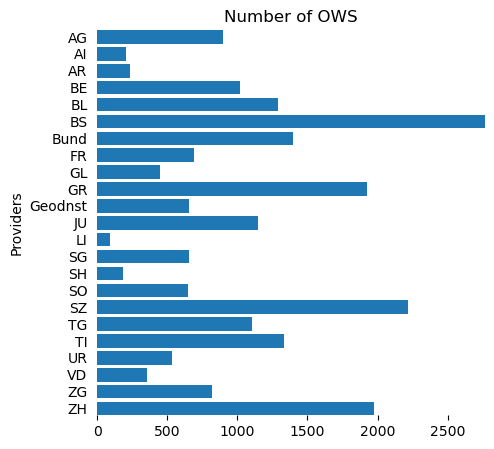

In [4]:
plt.figure(figsize = (5,5))
plt.barh(db_gr.index, db_gr['TITLE'])
plt.title("Number of OWS")
plt.autoscale(tight=True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.tick_params(axis='y', which='both', left=False)
plt.ylabel("Providers")
plt.show()

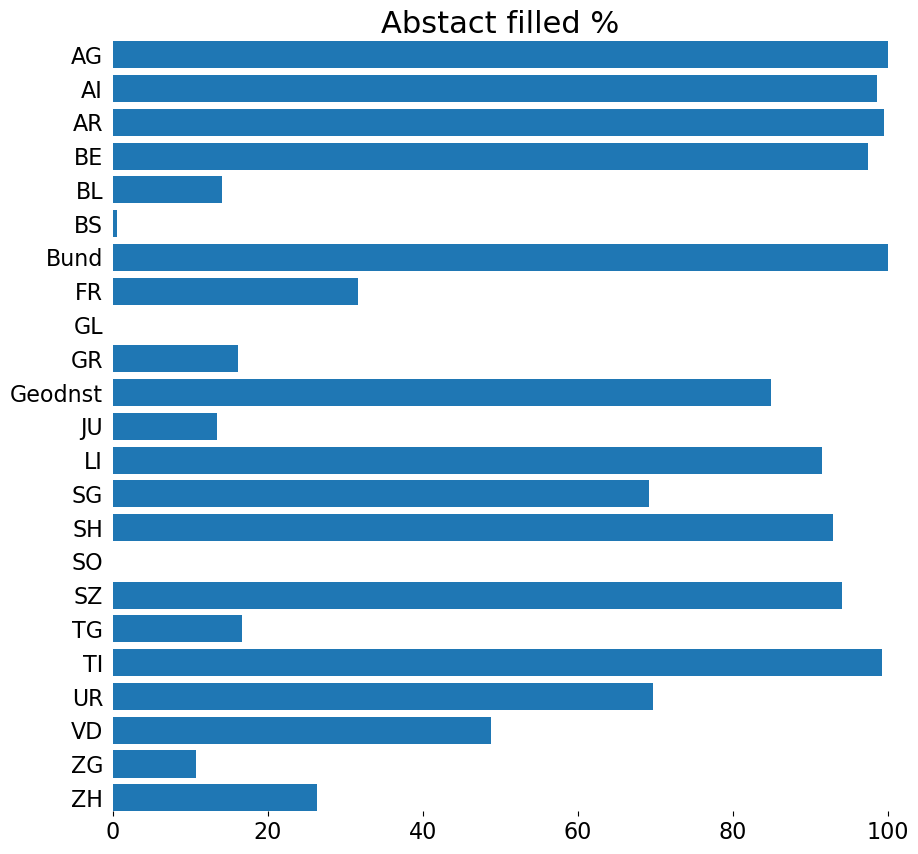

In [26]:
plt.figure(figsize = (10,10))
plt.barh(db_gr.index, db_gr['abstract_perc'])
plt.title("Abstact filled %", fontsize=22)
plt.autoscale(tight=True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.tick_params(axis='y', which='both', left=False)
plt.rcParams.update({"font.size":18})
plt.xlim(0,100)
# plt.ylabel("Providers")
plt.show()

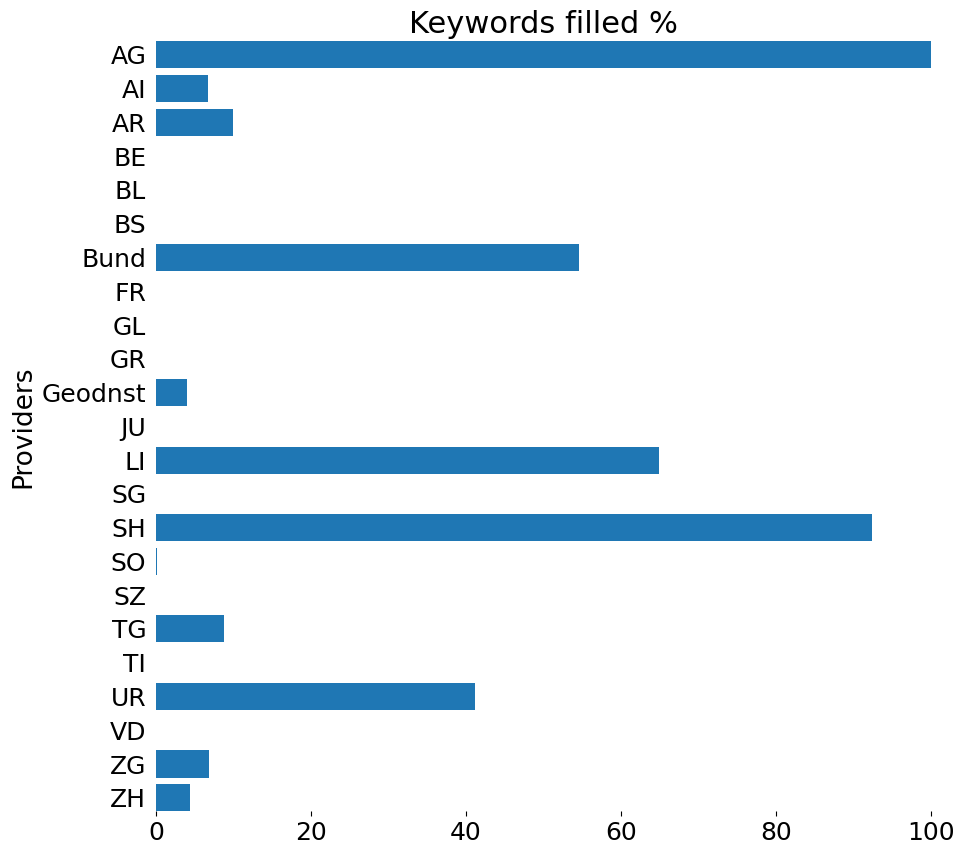

In [27]:
plt.figure(figsize = (10,10))
plt.barh(db_gr.index, db_gr['keywords_perc'], )
plt.title("Keywords filled %", fontsize=22)
plt.autoscale(tight=True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.tick_params(axis='y', which='both', left=False)
plt.rcParams.update({"font.size":18})
plt.xlim(0,100)
plt.ylabel("Providers", fontsize=19)
plt.show()

In [17]:
100 / db['abstract_w_count'].count() * db[db['abstract_w_count'] > 20]['ABSTRACT'].count()

14.854815864022664

In [31]:
db['abstract_w_count'].max()

294

In [14]:
test = db[['ABSTRACT', 'KEYWORDS', 'OWNER', 'abstract_w_count','keywords_w_count', 'TITLE']]
test = test.groupby(['OWNER']).mean()[['abstract_w_count','keywords_w_count']]
test.rename({'Geodienste':'Geodnst'}, inplace=True)
test.sort_values(by=['OWNER'], ascending=False, inplace=True)

C:\Users\ma1021525\AppData\Local\Temp\ipykernel_29516\1042194906.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  test = test.groupby(['OWNER']).mean()[['abstract_w_count','keywords_w_count']]


In [86]:
test1 = test.groupby(['OWNER','keywords_w_count']).count()['TITLE']

In [ ]:
plt.barh(test.index, test['abstract_w_count'], )
plt.title("Abstract Wordcount Median")
plt.autoscale(tight=True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.tick_params(axis='y', which='both', left=False)
plt.show()

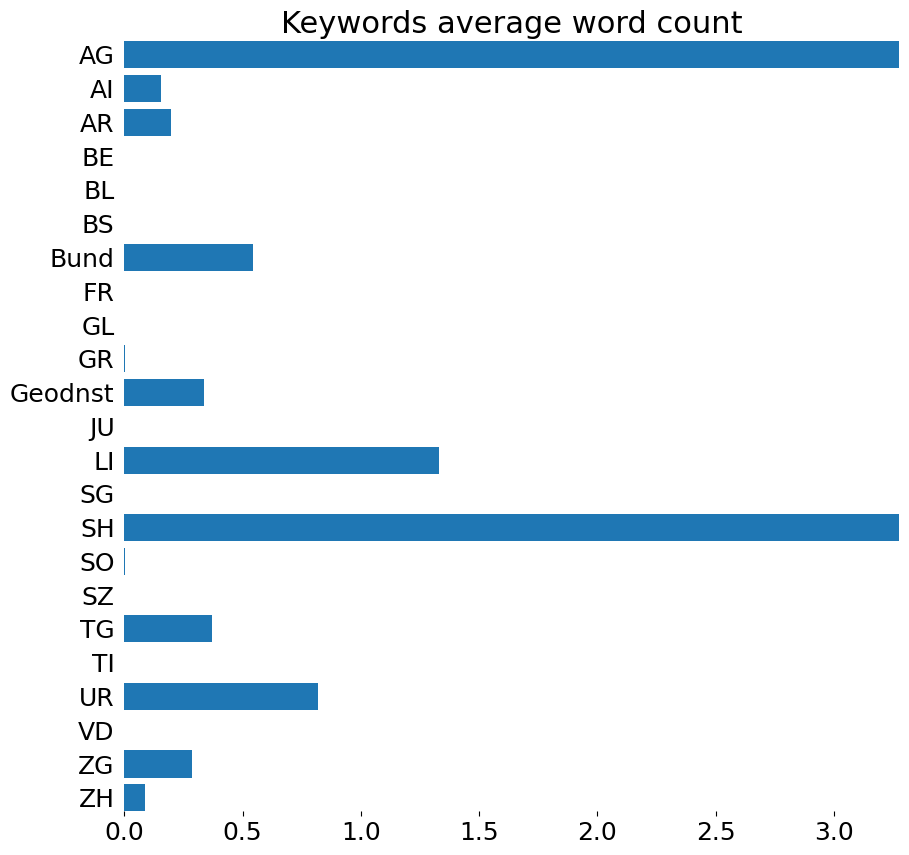

In [28]:
plt.figure(figsize = (10,10))
# plt.vlines(x=1.0, ymin=0, ymax=len(test.index.to_list())-0.5, color='grey')
plt.barh(test.index, test['keywords_w_count'], )
plt.title("Keywords average word count", fontsize=22)
plt.autoscale(tight=True)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.rcParams.update({"font.size":18})
plt.tick_params(axis='y', which='both', left=False)
plt.show()

## Testing functions from utils.py

### Improvement of the TF-IDF with BM25 to execute queries on the text

In [7]:
# abstracts = result['abstract'].values.tolist()
bm25 = utils.TFIDF_BM25()
bm25.cleansing_ranking(database, column='abstract') # 1421 lines in 36 s

In [6]:
# fit the vector to the database
bm25.fit()
# search the best match in the vector
res = bm25.search('Brandmeldeanlage')

### Implement the keyword extraction with spacy (NLP)

In [22]:
NLP = utils.NLP_spacy()
# Keyword
keywords_NLP = NLP.extract_keywords(database, column='abstract') # with small models

In [28]:
keywords_NLP[0]

[Geoportal]

In [15]:
# Original abstract
database['abstract'].values.tolist()[0]

'Diese Karte zeigt die Werkleitungen der Abwasserentsorgung an. Es wird die Strassenentwässerung und Liegenschaftsentwässerung (teilweise mit Hausanschluss) sowie das Kanalisationsnetz dargestellt. Darin ersichtlich sind unter anderem Leitungen mit Schmutzabwasser, Mischabwasser, Regenabwasser, Meteorwasser sowie Versickerungsanlagen, Kontrollschächte, Einlaufschächte und Ölabscheider. WMS Service Geoportal - Kanton Appenzell Innerrhoden'

### Test LSA and LSI with gensim for topic modelling

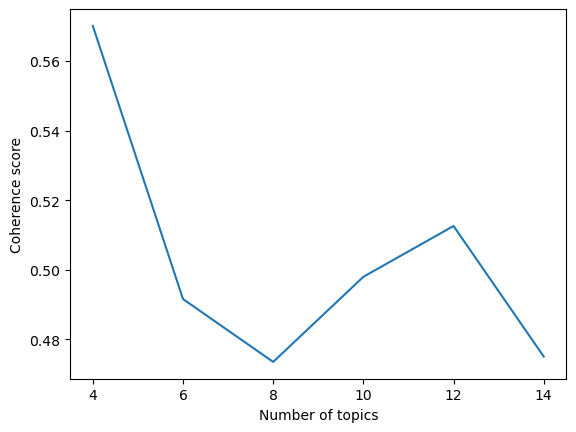

In [3]:
LSA = utils.LSI_LDA()
abstracts = LSA.preprocess(database)
LSA.compute_coherence_values_LSI((4,16,2))

In [8]:
best_number_topics = 12
number_of_words = 20
lsamodel = LSA.create_gensim_lsa_model(best_number_topics, number_of_words)

[(0, '-0.439*"art" + -0.433*"tvav" + -0.239*"enthalt" + -0.209*"dateneb" + -0.199*"definiert" + -0.192*"punkt" + -0.172*"fehl" + -0.172*"mittl" + -0.172*"toleranzstuf" + -0.172*"standardabweich" + -0.172*"richt" + -0.165*"kategori" + -0.144*"lagegenau" + -0.115*"bzw." + -0.096*"grenzpunkt" + -0.089*"geeignet" + -0.088*"auss" + -0.088*"zuverlass" + -0.088*"kenngross" + -0.088*"nachgewies"'), (1, '-0.416*"kanton" + -0.292*"wurd" + -0.281*"bern" + -0.232*"datensatz" + -0.230*"https" + -0.209*"//geofiles.be.ch/geoportal/pub/vertrieb/agi_dv_nutzungsbedingungen_de.pdf" + -0.147*"\'\'" + -0.146*"``" + -0.138*"gemass" + -0.129*"fff" + -0.129*"kantonal" + -0.121*"flach" + -0.116*"sitz" + -0.111*"gewasserraum" + -0.101*"strass" + -0.099*"grenz" + -0.094*"dat" + -0.092*"enthalt" + -0.089*"gemeind" + -0.088*"generalisiert"'), (2, '-0.436*"sitz" + 0.335*"\'\'" + 0.333*"``" + -0.326*"bern" + 0.306*"datensatz" + -0.147*"https" + -0.142*"//geofiles.be.ch/geoportal/pub/vertrieb/agi_dv_nutzungsbedingung

In [9]:
lsamodel.print_topics(best_number_topics, number_of_words)

[(0,
  '-0.439*"art" + -0.433*"tvav" + -0.239*"enthalt" + -0.209*"dateneb" + -0.199*"definiert" + -0.192*"punkt" + -0.172*"fehl" + -0.172*"mittl" + -0.172*"toleranzstuf" + -0.172*"standardabweich" + -0.172*"richt" + -0.165*"kategori" + -0.144*"lagegenau" + -0.115*"bzw." + -0.096*"grenzpunkt" + -0.089*"geeignet" + -0.088*"auss" + -0.088*"zuverlass" + -0.088*"kenngross" + -0.088*"nachgewies"'),
 (1,
  '-0.416*"kanton" + -0.292*"wurd" + -0.281*"bern" + -0.232*"datensatz" + -0.230*"https" + -0.209*"//geofiles.be.ch/geoportal/pub/vertrieb/agi_dv_nutzungsbedingungen_de.pdf" + -0.147*"\'\'" + -0.146*"``" + -0.138*"gemass" + -0.129*"fff" + -0.129*"kantonal" + -0.121*"flach" + -0.116*"sitz" + -0.111*"gewasserraum" + -0.101*"strass" + -0.099*"grenz" + -0.094*"dat" + -0.092*"enthalt" + -0.089*"gemeind" + -0.088*"generalisiert"'),
 (2,
  '-0.436*"sitz" + 0.335*"\'\'" + 0.333*"``" + -0.326*"bern" + 0.306*"datensatz" + -0.147*"https" + -0.142*"//geofiles.be.ch/geoportal/pub/vertrieb/agi_dv_nutzungsb

### Test Text Summarization and Latent Dirchlet allocation (LDA) for topic modeling

In [16]:
# https://towardsdatascience.com/text-summarization-for-clustering-documents-2e074da6437a
# https://towardsdatascience.com/nlp-topic-modeling-to-identify-clusters-ca207244d04f

# https://medium.com/plain-simple-software/build-an-ai-text-summarizer-in-python-6209fb23875d

#### Keywords extraction

In [18]:
NLP = utils.NLP_spacy()
keywords_dataset = NLP.extract_refined_keywords(database, use_rake=True, column='abstract',
                                          keyword_length=3, num_keywords=15)

Wxtracting keywords with RAKE...
Finalizing the keywords with SpaCy...
Finalizing the keywords with SpaCy...
Finalizing the keywords with SpaCy...
Finalizing the keywords with SpaCy...
Finalizing the keywords with SpaCy...
Finalizing the keywords with SpaCy...
Finalizing the keywords with SpaCy...
Finalizing the keywords with SpaCy...
Finalizing the keywords with SpaCy...
Finalizing the keywords with SpaCy...
Finalizing the keywords with SpaCy...
Finalizing the keywords with SpaCy...
Finalizing the keywords with SpaCy...
Finalizing the keywords with SpaCy...
Finalizing the keywords with SpaCy...
Finalizing the keywords with SpaCy...
Finalizing the keywords with SpaCy...
Finalizing the keywords with SpaCy...
Finalizing the keywords with SpaCy...
Finalizing the keywords with SpaCy...
Finalizing the keywords with SpaCy...
Finalizing the keywords with SpaCy...
Finalizing the keywords with SpaCy...
Finalizing the keywords with SpaCy...
Finalizing the keywords with SpaCy...
Finalizing the ke

In [21]:
keywords_dataset[3]

['karte zeigt',
 'rechtsgültigen stand',
 'graustufenfüllung',
 'roter farbe',
 'graustufen',
 'gebäude',
 'landeskarten',
 'projektierten stand',
 'swisstopo 1',
 'amtlichen vermessung',
 'schwarz',
 'kommunalen übersichtsplan']

In [22]:
database.loc[3]['abstract']

"Diese Karte zeigt in roter Farbe den pendenten, bzw. projektierten Stand der amtlichen Vermessung und in schwarz/weisser Darstellung deren aktuellen, rechtsgültigen Stand, mit Graustufenfüllung der Gebäude, sowie den kommunalen Übersichtsplan und die Landeskarten von swisstopo 1:50'000 bis 1:1'000'000 in Graustufen an."

In [34]:
# Add the extracted keywords to the raw data dataframe
def join_keywords(keywords_list):
    keywords = ', '.join(kw for kw in keywords_list)
    return keywords
database_raw['keywords_nlp'] = list(map(join_keywords, keywords_dataset))

#### GPT model

In [ ]:
import streamlit as st
st.title("Summarizer")
input_text = st.text_area(label='Enter full text:', value='', height=250)
st.button("submit")
output_text = st.text_area(label='Summarized text:', value='', height=250)

In [11]:
import openai
import os
openai.api_key = os.getenv('OPENAI_KEY') # WARNING: limits to 18$ free credits!

def summarize_GPT(text):
    prompt = f"summarize this text: {text}"
    model = openai.Completion.create(model='text-davinci-003', prompt=prompt, temperature=.5, max_tokens=1000,)
    return model["choices"][0]['text']

In [12]:
summarize_GPT('''Thermal infrared imagery is very much gaining in importance in the diagnosis of energy
losses in cultural heritage through non-destructive measurement methods. Hence, owing to the fact
that it is a very innovative and, above all, safe solution, it is possible to determine the condition of the
building, locate places exposed to thermal escape, and plan actions to improve the condition of the
facility. The presented work is devoted to the technology of creating a dense point cloud and a 3D
model, based on data obtained from UAV. It has been shown that it is possible to build a 3D point
model based on thermograms with the specified accuracy by using thermal measurement marks and
the dense matching method. The results achieved in this way were compared and, as the result of
this work, the model obtained from color photos was integrated with the point cloud created on the
basis of the thermal images. The discussed approach exploits measurement data obtained with three
independent devices (tools/appliances): a Matrice 300 RTK drone (courtesy of NaviGate); a Phantom
4 PRO drone; and a KT-165 thermal imaging camera. A stone church located in the southern part of
Poland was chosen as the measuring object.''')

'\n\nThis text discusses a technology that combines data from a UAV, a Matrice 300 RTK drone, a Phantom 4 PRO drone, and a KT-165 thermal imaging camera to create a 3D point model and a 3D model of a stone church in Poland. The resulting model is used to diagnose energy losses in cultural heritage and plan actions to improve the condition of the facility.'

#### T5 abstractive summarization

In [39]:
from transformers import T5ForConditionalGeneration, T5Tokenizer
import torch
model = T5ForConditionalGeneration.from_pretrained("google/mt5-large") #  google/mt5-large
tokenizer = T5Tokenizer.from_pretrained('google/mt5-large')
device = torch.device('cpu')
task_prefix = 'Summarize:'
body = '''Thermal infrared imagery is very much gaining in importance in the diagnosis of energy
losses in cultural heritage through non-destructive measurement methods. Hence, owing to the fact
that it is a very innovative and, above all, safe solution, it is possible to determine the condition of the
building, locate places exposed to thermal escape, and plan actions to improve the condition of the
facility. The presented work is devoted to the technology of creating a dense point cloud and a 3D
model, based on data obtained from UAV. It has been shown that it is possible to build a 3D point
model based on thermograms with the specified accuracy by using thermal measurement marks and
the dense matching method. The results achieved in this way were compared and, as the result of
this work, the model obtained from color photos was integrated with the point cloud created on the
basis of the thermal images. The discussed approach exploits measurement data obtained with three
independent devices (tools/appliances): a Matrice 300 RTK drone (courtesy of NaviGate); a Phantom
4 PRO drone; and a KT-165 thermal imaging camera. A stone church located in the southern part of
Poland was chosen as the measuring object.'''
tokenized_text = tokenizer.encode(task_prefix + body.strip().replace('\n',''), return_tensors="pt").to(device)
summary = model.generate(tokenized_text, num_beams=1, no_repeat_ngram_size=1, min_length=20, max_length=80,
                         early_stopping=True)
output = tokenizer.decode(summary[0], skip_special_tokens=True)


You are using a model of type mt5 to instantiate a model of type t5. This is not supported for all configurations of models and can yield errors.


In [41]:
output

'<extra_id_0> a dense point cloud and a 3D model. The presented work is devoted to the technology of creating a dense point cloud and a 3D model. <extra_id_14>. <extra_id_15>.  <extra_id_16>.  <extra_id_17>.  <extra_id_18>.  <extra_id_19>.  <extra_id_20>.  <extra_id_21>.  <extra_id_22>...  <extra_id_23>....'

#### Abstractive summarization with SBert model

In [ ]:
# Using Sentence-Bert to summarize the abstract (extractive summary)
# https://www.sbert.net/docs/pretrained_models.html#multi-lingual-models
from summarizer.sbert import SBertSummarizer
model = SBertSummarizer(model='paraphrase-multilingual-MiniLM-L12-v2') #all-MiniLM-L12-v2
body = '''Thermal infrared imagery is very much gaining in importance in the diagnosis of energy
losses in cultural heritage through non-destructive measurement methods. Hence, owing to the fact
that it is a very innovative and, above all, safe solution, it is possible to determine the condition of the
building, locate places exposed to thermal escape, and plan actions to improve the condition of the
facility. The presented work is devoted to the technology of creating a dense point cloud and a 3D
model, based on data obtained from UAV. It has been shown that it is possible to build a 3D point
model based on thermograms with the specified accuracy by using thermal measurement marks and
the dense matching method. The results achieved in this way were compared and, as the result of
this work, the model obtained from color photos was integrated with the point cloud created on the
basis of the thermal images. The discussed approach exploits measurement data obtained with three
independent devices (tools/appliances): a Matrice 300 RTK drone (courtesy of NaviGate); a Phantom
4 PRO drone; and a KT-165 thermal imaging camera. A stone church located in the southern part of
Poland was chosen as the measuring object.'''
summary = model(body, num_sentences=3)
print(summary)

In [ ]:
# with paraphrase-multilingual v2
'''Thermal infrared imagery is very much gaining in importance in the diagnosis of energy
losses in cultural heritage through non-destructive measurement methods. The results achieved in this way were compared and, as the result of
this work, the model obtained from color photos was integrated with the point cloud created on the
basis of the thermal images. A stone church located in the southern part of
Poland was chosen as the measuring object.'''
# with all-MiniLM-L12-v2
'''Thermal infrared imagery is very much gaining in importance in the diagnosis of energy
losses in cultural heritage through non-destructive measurement methods. The results achieved in this way were compared and, as the result of
this work, the model obtained from color photos was integrated with the point cloud created on the
basis of the thermal images. The discussed approach exploits measurement data obtained with three
independent devices (tools/appliances): a Matrice 300 RTK drone (courtesy of NaviGate); a Phantom
4 PRO drone; and a KT-165 thermal imaging camera.'''
# all-mpnet-base-v2
'''Thermal infrared imagery is very much gaining in importance in the diagnosis of energy
losses in cultural heritage through non-destructive measurement methods. The results achieved in this way were compared and, as the result of
this work, the model obtained from color photos was integrated with the point cloud created on the
basis of the thermal images. A stone church located in the southern part of
Poland was chosen as the measuring object.'''
# paraphrase-multilingual-MiniLM-L12-v2
'''Thermal infrared imagery is very much gaining in importance in the diagnosis of energy
losses in cultural heritage through non-destructive measurement methods. It has been shown that it is possible to build a 3D point
model based on thermograms with the specified accuracy by using thermal measurement marks and
the dense matching method. A stone church located in the southern part of
Poland was chosen as the measuring object.'''


#### Latent Dirichlet Allocation (LDA) with gensim for topic modelling

In [3]:
LDA = utils.LSI_LDA()
texts_tokenized = LDA.preprocess(database, column='abstract') # ca. 5 min
main_topics_lda = LDA.create_gensim_lda_model(categories='eCH') # ca. 3 min
vis = LDA.prepare_plot_lda()

In [ ]:
import pyLDAvis
pyLDAvis.display(vis)

### Topic classification with TF-IDF vectors and predefined categories

#### INSPIRE categories

In [4]:
import pandas as pd
df = pd.read_csv("data/INSPIRE_categories.csv", sep=';', encoding='UTF-16')
df.columns

Index(['category_EN', 'description_EN', 'category_DE', 'description_DE',
       'category_FR', 'description_FR', 'category_IT', 'description_IT',
       'complete_description'],
      dtype='object')

In [2]:
len(df)

34

In [8]:
df.loc[0][8]

'The theme establishes a structure for spatial referencing of features by coordinates. This topic shall link to appropriate standards for information technology and data where possible, and provide a framework for the development of sector-specific applications using geographic data.\\n\\n ISO 19111 describes the conceptual schema and defines the description for a minimum data to two cases for which 1-, 2- and 3- dimensional coordinates reference system information shall be given. The first case is given by a coordinate reference system to which a set of coordinates is related. The second case consists of a coordinate operation (coordinate transformation, coordinate conversion, concatenated coordinate operation) to change coordinate values from one coordinate reference system to another. \\n\\nThere are no explicit accuracy numbers given in ISO 19111. We must consider that it has been developed for geographic information in general, but not for precise positioning. Spatial information 

#### eCH categories

In [5]:
import pandas as pd
df = pd.read_csv("data/eCH_categories.csv", sep=';', encoding='UTF-16')
df.columns

Index(['ID', 'notation', 'category_EN', 'category_DE', 'category_FR',
       'category_IT', 'category_RM'],
      dtype='object')

In [6]:
len(df)

27

#### Topic classification with TF-IDF vector

In [5]:
bm25 = utils.TFIDF_BM25()
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy import sparse
# prepare the categories for INSPIRE
cats_index = df.index.values
# translate from english to german because the german description is too short
full_desc_DE = [utils.translate(element, lang='de', translator='google') for element in df['complete_description'].tolist()]
description_title_DE = [df['category_DE'].values.tolist()[i]+', '+full_desc_DE[i]
                     for i in range(0, len(df))]
stemmed_categories = [utils.tokenize_abstract(text, output_scores=False, stem_words=True) for
                       text in description_title_DE]
joined_categories = [' '.join(words) for words in stemmed_categories]
vectorizer = bm25.vectorizer
vectorizer.fit(joined_categories)
score_categories = super(TfidfVectorizer, vectorizer).transform(joined_categories)
doc_length = score_categories.sum(1).A1
avd = score_categories.sum(1).mean()

In [6]:
stemmed_keywords = [utils.stemming_sentence(text) for text in [' '.join(words) for words in keywords_dataset]]

In [31]:
# prepare the database for the search (keywordds from rake in class NLP_spacy)
# WARNING: the results aren't satisfactory
import numpy as np
dataset = 20
k1 = 1.6
b = 0.75
for word in stemmed_keywords[dataset]:
    query, = super(TfidfVectorizer, vectorizer).transform([word])
    assert sparse.isspmatrix_csr(query)
    kw = score_categories.tocsc()[:, query.indices]
    idf = vectorizer._tfidf.idf_[None, query.indices] - 1.
    scores = (kw.multiply(np.broadcast_to(idf, kw.shape)) * (k1 + 1)/ kw + (k1 * (1 - b + b * doc_length / avd))[:, None]).sum(1).A1
    scores = [round(score, 2) for score in scores if score != 0.0 and not np.isnan(score)]
    category = [cats_index[i] for i in range(0, len(scores)) if scores[i] > 0.0]
    print(category, scores, word)


[0, 1, 2, 3, 4] [6.12, 5.96, 6.12, 8.89, 6.68] standort
[] [] entscheidungsgrundlag
[] [] legend
[] [] erhebungsmassstab
[0, 1, 2, 3, 4] [7.07, 7.66, 8.89, 7.35, 6.1] kart
[] [] dient
[0, 1, 2, 3] [7.65, 8.24, 6.57, 9.47] weit
[] [] erlauter
[] [] uber
[] [] informationsfen
[] [] aufrufbar
[] [] zulassigkeitsbereich
[] [] erdsond
[0] [15.33] erstell
[0] [10.51] erstellt
[] [] erdwarmesond
[] [] zulassigkeitsbereich
[] [] erdwarmesond


In [8]:
description_title_DE[17], description_title_DE[19], description_title_DE[5]

('Umweltüberwachung, Der Themenbereich enthält zwei Hauptaspekte; Das erste ist die Umweltüberwachungsanlage als räumliches Objekt. Die zweite sind die Daten, die durch Beobachtungen und Messungen in dieser Einrichtung erhoben werden und mit dem Standardstand der ISO 19156 codiert werden. Diese Informationen werden durch weitere Verwaltungsinformationen im Zusammenhang mit der Einrichtung und den dort durchgeführten Aktivitäten wie Netzwerken ergänzt. Das Thema der Umweltüberwachungseinrichtungen ist die Überschreitung in Umweltbereiche. Daher ermöglicht das generische Modell die notwendige Freiheit, thematische spezifische Bedürfnisse einzubeziehen und gleichzeitig eine gemeinsame Datenstruktur aufrechtzuerhalten.',
 'Produktions- und Industrieanlagen, Das Thema "Produktions- und Industrieanlagen" umfasst Informationen zu Industrieanlagen und -produktionsaktivitäten (mit Schwerpunkt auf Extraktion, Transformation oder Lagerung von Ressourcen, einschließlich der Energieerzeugung) und d

In [9]:
database.loc[dataset]['abstract']

'Die Karte stellt den Zustand Versickerung des generellen Entwässerungsproj. GEP dar.  Es wird dringend empfohlen, vor allfälligen Planungsarbeiten mit der zuständigen Gemeindebehörde Kontakt aufzunehmen (Retentionsauflagen, Zusatzinformationen).'

### Possible additional tests

In [ ]:
# Jaccard/Cosine similarity -> for query search
# WordNet-word-similarity -> for query search

## Add extracted data to raw data

#### Extract keywords from the abstract and add them to raw data

In [4]:
# Keyword extraction
NLP = utils.NLP_spacy()
keywords_dataset = NLP.extract_refined_keywords(database, use_rake=True, refine_keywords=True,
                                                 column='abstract', keyword_length=3, num_keywords=15)

# Add the extracted keywords to the raw data dataframe
def join_keywords(keywords_list):
    keywords = ', '.join(kw for kw in keywords_list)
    return keywords
database_raw['keywords_nlp'] = list(map(join_keywords, keywords_dataset))
# database_raw['keywords_rake'] = list(map(join_keywords, keywords_dataset))          

Extracting keywords with RAKE...


100%|██████████| 42576/42576 [03:12<00:00, 220.98it/s] 


#### Summarize the abstracts with a SBert model and add them to the raw data

In [ ]:
summaries = NLP.summarize_texts(database, column='abstract')

In [40]:
len(summaries)
database_raw['summary'] = summaries

#### Detect and add the dataset's language based on titles

In [6]:
language_dict = {'english':('EN', 'ENG'), 'french':('FR','FRA'), 'german':('DE','DEU'), 'italian':('IT','ITA'), 'not_found':('NA','NAN')}
database_raw['lang_3'] = database_raw.apply(lambda row: language_dict[utils.detect_language(row['title'], not_found=True)][1], axis=1)
database_raw['lang_2'] = database_raw.apply(lambda row: language_dict[utils.detect_language(row['title'], not_found=True)][0], axis=1)

#### Check metadata quality and save it in the database

In [7]:
database_raw = utils.check_metadata_quality(database_raw, search_word='nan',
                                            search_columns=['abstract', 'keywords', 'metadata'],
                                            case_sensitive=False)

#### Clean the dataset for redis

In [8]:
# clean up the str in the dataframe
database_raw = database_raw.replace(to_replace="'", value="-", regex=True)
database_raw = database_raw.replace(to_replace='\"', value="-", regex=True)
database_raw = database_raw.replace(to_replace="  ", value = " ", regex=True)
database_raw = database_raw.replace(to_replace="    ", value = " ", regex=True)

In [187]:
# database_raw.to_csv('rawdata_scraper.csv')
database_raw.to_pickle('data/test_preprocessed.pkl')

In [2]:
db = pd.read_pickle('data/test_preprocessed.pkl')
row = 201
print(db['abstract'].loc[row])
print(db['keywords_rake'].loc[row])
print(db['keywords_nlp'].loc[row])

Geodaten des Bundesamtes für Energie, als WMS der swisstopo bezogen. Der Windatlas Schweiz beschreibt die Windverhältnisse auf fünf Höhen über Grund: 50, 75, 100, 125 und 150 m. Die Daten basieren auf einer schweizweiten Modellierung mit einer horizontalen Gitterweite von 100 m. In der Karte ist für jeden Gitterpunkt der modellierte Jahresmittelwert der Windgeschwindigkeit dargestellt. Die Verteilung der Windgeschwindigkeiten in Windgeschwindigkeitsklassen kann mit den Weibullparametern A (Skalenparameter) und k (Formparameter) angenähert werden. Aus den Weibullparametern kann nicht direkt auf den Mittelwert der Windgeschwindigkeit geschlossen werden, da es sich um eine Annäherung an eine Windverteilung handelt und diese nicht für jeden Standort ausreichend wiedergegeben werden kann. Die Windrose zeigt die relative Häufigkeit der modellierten Windrichtungen. Pro Sektor sind die gemittelten Windgeschwindigkeiten und zugehörigen Weibullparameter ersichtlich. Für die Berechnung der Windge

#### Translate dataset

In [158]:
NLP = utils.NLP_spacy()# missing keywords from abstract: 4803
keywords_dataset = NLP.extract_refined_keywords(db[(db['keywords_nlp']=='')],
                                                use_rake=True, refine_keywords=True,
                                                column='title', keyword_length=3, num_keywords=15)
k = 0
for i, row in db[(db['keywords_nlp']=='')].iterrows():
    if keywords_dataset[k]:
        db.loc[i, 'keywords_nlp'] = ",".join(keywords_dataset[k])
    k += 1

Extracting keywords with RAKE...


100%|██████████| 6777/6777 [01:49<00:00, 61.70it/s] 


In [4]:
pickle_path = "C:/Users/ma1021525/OneDrive - FHNW/Documents/Projects/git/Geoharvester/scraper/data/merged_data.pkl"
db = pd.read_pickle(pickle_path)
# utils.translate(text, to_lang='de', translator='google')

In [3]:
db1 = db.copy()
db1.loc[50, 'name'] = 'ch.geoportal.geologie_boden_naturbedingte_risiken.999.0.geotechnische_karte_kt'

In [27]:
import numpy as np
test = db.merge(db1, on=['name','title','provider','keywords','abstract'], how='outer', indicator='_merge')
to_preprocessing = test[test['_merge'] == 'right_only'] # right_only = db1 -> goes to preprocessing
to_keep = db.drop(test[test['_merge'] == 'left_only'].index, inplace=False)# left_only = db ->

In [31]:
len(to_keep), len(test), len(to_preprocessing), len(db1)

(42575, 64161, 1, 42576)

In [5]:
db.columns

Index(['provider', 'title', 'name', 'preview', 'tree', 'group', 'abstract',
       'keywords', 'legend', 'contact', 'endpoint', 'metadata', 'update',
       'service', 'max_zoom', 'center_lat', 'center_lon', 'bbox',
       'keywords_nlp', 'summary', 'lang_3', 'lang_2', 'metaquality',
       'title_en', 'title_de', 'title_it', 'title_fr', 'abstract_en',
       'abstract_de', 'abstract_it', 'abstract_fr', 'keywords_en',
       'keywords_de', 'keywords_it', 'keywords_fr', 'keywords_nlp_en',
       'keywords_nlp_de', 'keywords_nlp_it', 'keywords_nlp_fr'],
      dtype='object')

In [15]:
print(db[['provider','title','name','tree']][100:110].to_markdown())
"""'provider', 'title', 'name', 'preview', 'tree', 'group', 'abstract',
       'keywords', 'legend', 'contact', 'endpoint', 'metadata', 'update',
       'service', 'max_zoom', 'center_lat', 'center_lon', 'bbox',
       'keywords_rake', 'keywords_nlp', 'summary', 'lang_3', 'lang_2',
       'metaquality',"""

|     | provider   | title                                  | name                                                                              | tree                                     |
|----:|:-----------|:---------------------------------------|:----------------------------------------------------------------------------------|:-----------------------------------------|
| 100 | KT_AI      | Landeskarte LK10 CH                    | ch.geoportal.basiskarten_bodenbedeckung_bilddaten.1872.0.landeskarte_lk10_ch      | KT_AI/WMS Geoportal.ch/ch.geoportal.ktai |
| 101 | KT_AI      | Landeskarte LK10 grau CH               | ch.geoportal.basiskarten_bodenbedeckung_bilddaten.1873.0.landeskarte_lk10_grau_ch | KT_AI/WMS Geoportal.ch/ch.geoportal.ktai |
| 102 | KT_AI      | Landeskarte LK25 CH                    | ch.geoportal.basiskarten_bodenbedeckung_bilddaten.1876.0.landeskarte_lk25_ch      | KT_AI/WMS Geoportal.ch/ch.geoportal.ktai |
| 103 | KT_AI      | Landeskarte LK50 CH               

"'provider', 'title', 'name', 'preview', 'tree', 'group', 'abstract',\n       'keywords', 'legend', 'contact', 'endpoint', 'metadata', 'update',\n       'service', 'max_zoom', 'center_lat', 'center_lon', 'bbox',\n       'keywords_rake', 'keywords_nlp', 'summary', 'lang_3', 'lang_2',\n       'metaquality',"

In [96]:
for i, row in db[(db['lang_2']=='NA')&(db['provider']=='Bund')].iterrows():
    db.loc[i, 'lang_2'] = 'DE'
    db.loc[i, 'lang_3'] = 'DEU'

In [42]:
language_dict = {'english':('EN', 'ENG'), 'french':('FR','FRA'), 'german':('DE','DEU'), 'italian':('IT','ITA'), 'not_found':('NA','NAN')}
for i, row in db[(db['lang_2']=='NA')&(db['keywords']!='nan')].iterrows():
    lang = utils.detect_language(row['keywords'], not_found=True)
    if lang[0] != 'not_found':
        lan = language_dict[lang]
        db.loc[i, 'lang_2'] = lan[0]
        db.loc[i, 'lang_3'] = lan[1]

In [5]:
from deep_translator import GoogleTranslator, exceptions

def translate_text(text, to_lang, from_lang):
    language_dict = {'ENG':'en', 'FRA':'fr', 'DEU':'de', 'ITA':'it','NAN':'na'}
    if language_dict[from_lang] == to_lang:
        return text
    else:
        try:
            trnd = GoogleTranslator(source='auto', target=to_lang).translate(text.replace('_',' '))
        except exceptions.TranslationNotFound:
            trnd = 'nan'
        return trnd

def translate_abstract(text, to_lang, from_lang):
    language_dict = {'ENG':'en', 'FRA':'fr', 'DEU':'de', 'ITA':'it','NAN':'na'}
    if to_lang != language_dict[from_lang] and text != 'nan':
        if not text.startswith('http') or text.startswith('Link zu Metadaten:'):
            try:
                trnd = GoogleTranslator(source='auto', target=to_lang).translate(text.replace('_',' '))
            except exceptions.TranslationNotFound:
                trnd = 'nan'
            return trnd
        else:
            return 'nan'
    else:
        return text
    
def translate_keywords(text, to_lang, from_lang):
    if type(text) == str:
        text = [text]
    kwds = []
    for kwd in text:
        language_dict = {'ENG':'en', 'FRA':'fr', 'DEU':'de', 'ITA':'it','NAN':'na'}
        if kwd != 'nan' and language_dict[from_lang] != to_lang:
            if not kwd.startswith('http') or kwd.startswith('Link zu Metadaten:'):
                try:
                    kwd_trnsd = GoogleTranslator(source='auto', target=to_lang).translate(kwd.replace('_',' '))
                    if not kwd_trnsd:
                        kwd_trnsd = 'nan'
                except exceptions.TranslationNotFound:
                    kwd_trnsd = 'nan'
            else:
                kwd_trnsd = 'nan'
            kwds.append(kwd_trnsd)
        else:
            kwds.append(kwd)
    return ','.join(kwds)

In [11]:
from tqdm import tqdm
tqdm.pandas()
languages = ['de']
translate_column = 'keywords_nlp'#'title'#'abstract' # title # keywords

for lang in languages:
    print(f"translating {translate_column} in {lang} ...")
    new_column = translate_column+'_'+lang
    if translate_column == 'title':
        db[new_column] = db.progress_apply(lambda row: translate_text(row[translate_column],to_lang=lang, from_lang=row['lang_3']), axis=1)
    elif translate_column == 'abstract':
        db[new_column] = db.progress_apply(lambda row: translate_abstract(row[translate_column], to_lang=lang, from_lang=row['lang_3']), axis=1)
    elif translate_column == 'keywords':
        db[new_column] = db.progress_apply(lambda row: translate_keywords(row[translate_column], to_lang=lang, from_lang=row['lang_3']), axis=1)
    else:
        db[new_column] = db.progress_apply(lambda row: translate_keywords(row[translate_column].split(','), to_lang=lang, from_lang=row['lang_3']), axis=1)
    db.to_pickle(pickle_path)

translating keywords_nlp in de ...


100%|██████████| 42576/42576 [1:16:29<00:00,  9.28it/s]  


In [28]:
column = 'keywords'
def count_links(field):
    if field.startswith('http') or field.startswith('Link zu Metadaten:'):
        return 1
    else:
        return 0
def count_nan(field):
    if field == 'nan':
        return 1
    else:
        return 0

db[f'{column}_link'] = db.progress_apply(lambda row: count_links(row[column]), axis=1)
db[f'{column}_nan'] = db.progress_apply(lambda row: count_nan(row[column]), axis=1)

100%|██████████| 42576/42576 [00:00<00:00, 231938.26it/s]


In [51]:
db_gr = db.groupby(['provider'], numeric_only=True).sum()[['abstract_link', 'abstract_nan','keywords_link','keywords_nan']]
db_gr.rename({'Geodienste':'Geodnst'}, inplace=True)
db_gr.sort_values(by=['provider'], ascending=False, inplace=True)
db_gr['count'] = db.groupby(['provider']).count()[['title']].sort_values(by=['provider'], ascending=False)['title'].to_list()
db_gr['abstract'] = 100 / db_gr['TITLE'] * db_gr['ABSTRACT']

C:\Users\ma1021525\AppData\Local\Temp\ipykernel_6944\3514504426.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  db_gr = db.groupby(['provider']).sum()[['abstract_link', 'abstract_nan','keywords_link','keywords_nan']]


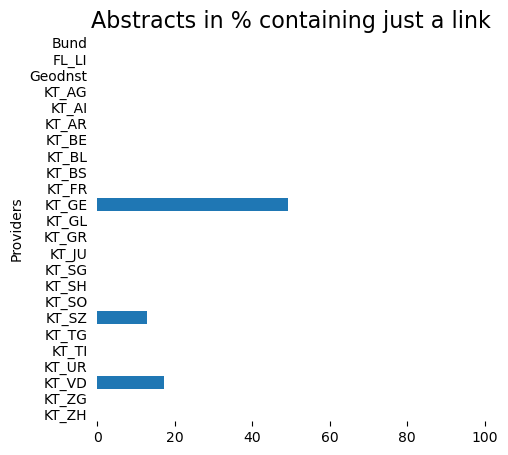

In [64]:
plt.figure(figsize = (5,5))
plt.barh(db_gr.index, 100 / db_gr['count'] * db_gr['abstract_link'])
plt.title("Abstracts in % containing just a link", fontsize=16)
plt.autoscale(tight=True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.tick_params(axis='y', which='both', left=False)
plt.rcParams.update({"font.size":10})
plt.xlim(0,100)
plt.ylabel("Providers")
plt.show()

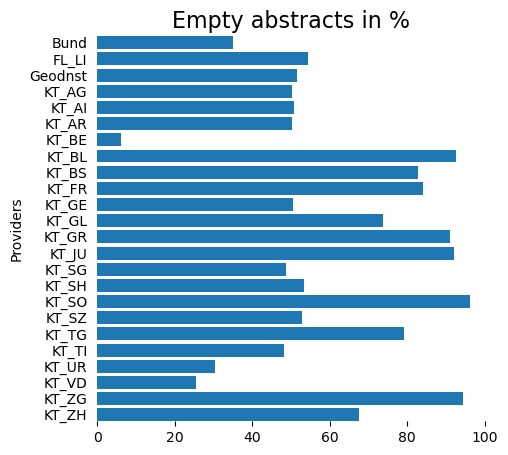

In [66]:
plt.figure(figsize = (5,5))
plt.barh(db_gr.index, 100 / db_gr['count'] * db_gr['abstract_nan'])
plt.title("Empty abstracts in %", fontsize=16)
plt.autoscale(tight=True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.tick_params(axis='y', which='both', left=False)
plt.rcParams.update({"font.size":10})
plt.xlim(0,100)
plt.ylabel("Providers")
plt.show()

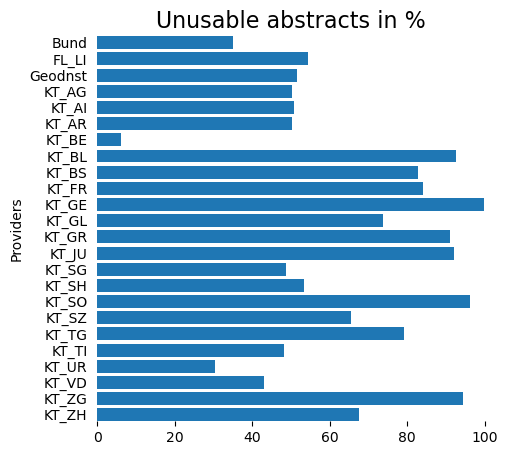

In [65]:
plt.figure(figsize = (5,5))
plt.barh(db_gr.index, 100 / db_gr['count'] * (db_gr['abstract_link']+db_gr['abstract_nan']))
plt.title("Unusable abstracts in %", fontsize=16)
plt.autoscale(tight=True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.tick_params(axis='y', which='both', left=False)
plt.rcParams.update({"font.size":10})
plt.xlim(0,100)
plt.ylabel("Providers")
plt.show()

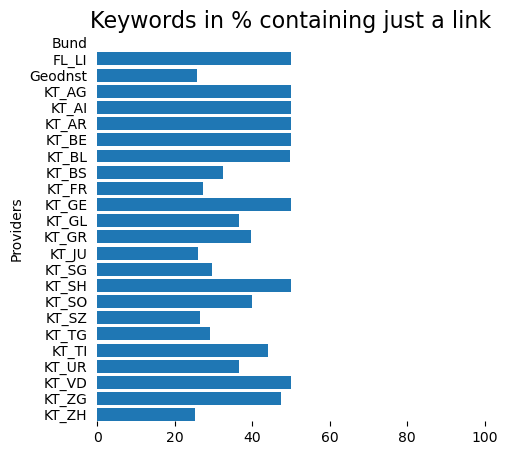

In [67]:
plt.figure(figsize = (5,5))
plt.barh(db_gr.index, 100 / db_gr['count'] * db_gr['keywords_link'])
plt.title("Keywords in % containing just a link", fontsize=16)
plt.autoscale(tight=True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.tick_params(axis='y', which='both', left=False)
plt.rcParams.update({"font.size":10})
plt.xlim(0,100)
plt.ylabel("Providers")
plt.show()

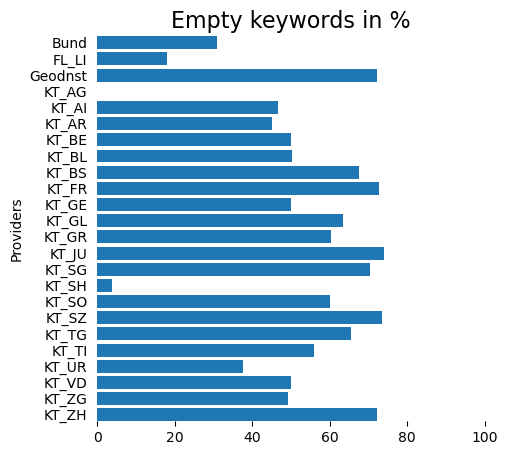

In [68]:
plt.figure(figsize = (5,5))
plt.barh(db_gr.index, 100 / db_gr['count'] * db_gr['keywords_nan'])
plt.title("Empty keywords in %", fontsize=16)
plt.autoscale(tight=True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.tick_params(axis='y', which='both', left=False)
plt.rcParams.update({"font.size":10})
plt.xlim(0,100)
plt.ylabel("Providers")
plt.show()

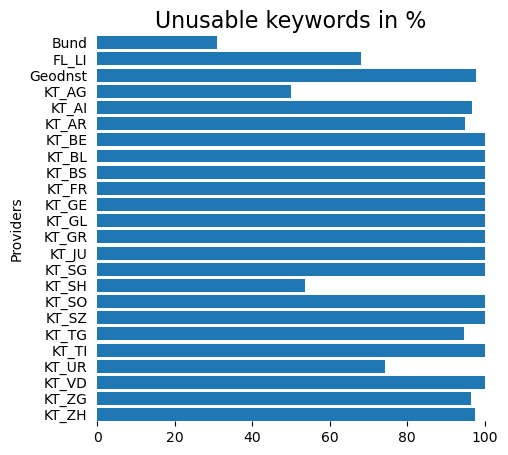

In [70]:
plt.figure(figsize = (5,5))
plt.barh(db_gr.index, 100 / db_gr['count'] * (db_gr['keywords_link']+db_gr['keywords_nan']))
plt.title("Unusable keywords in %", fontsize=16)
plt.autoscale(tight=True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.tick_params(axis='y', which='both', left=False)
plt.rcParams.update({"font.size":10})
plt.xlim(0,100)
plt.ylabel("Providers")
plt.show()

## Evaluation ranking function
- Results relevance evaluation
- Results ranking evaluation

In [1]:
import pandas as pd
import numpy as np
import sys, os
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'server'))
from app.redis.methods import results_ranking, test_ranking

db = pd.read_pickle('data/preprocessed_data.pkl')
# db = db.rename(columns={'OWNER':'provider','TITLE':'title', 'NAME':'name','MAPGEO':'mapgeo','TREE':'tree','GROUP':'group',
#                    'ABSTRACT':'abstract','KEYWORDS':'keywords','KEYWORDS_NLP':'keywords_nlp','LEGEND':'legend',
#                    'CONTACT':'contact','ENDPOINT':'endpoint','METADATA':'metadata','UPDATE':'update','SERVICE':'service',
#                    'MAX_ZOOM':'max_zoom','CENTER_LAT':'center_lat','CENTER_LON':'center_lon','BBOX':'bbox','SUMMARY':'summary',
#                    'LANG_3':'lang_3','LANG_2':'lang_2','METAQUALITY':'metaquality'})
# db = db.rename(columns={'SERVICETYPE':'servicetype','SERVICELINK':'servicelink'})
# db.to_pickle('data/preprocessed_data.pkl')
db = db[['provider','title','abstract','keywords','keywords_nlp','metaquality']]

In [2]:
# t0 = time()
db[(db['title'].str.contains('Winterthur', case=False)) | (db['keywords_nlp'].str.contains('winterthur', case=False))]# possiamo indicizzarlo essendo solo 6 keywords (verkehrsanordnung , städte zürich, kanton zürich, winterthur, tempo30, begegnungszonen'), mentre invece l'abstract di 33 parole viene diffice e le keywords normali sono vuote! (dataset: 17705)
# print(round(time()-t0,2))

,provider,title,abstract,keywords,keywords_nlp,metaquality
16343,KT_ZH,Verkehrsberuhigte Zonen der Stadt Winterthur (...,nan,nan,nan,25
17595,KT_ZH,Gemeinden mit Stadtkreisen von Zürich und Wint...,Stadtkreise Zürich und Winterthur integriert i...,nan,"stadtkreise zürich, gemeinden, winterthur inte...",75
17647,KT_ZH,Gemeinden mit Quartieren von Zürich und Winter...,Statistische Quartiere von Zürich und Quartier...,nan,"kantons, winterthur integriert, gemeinden, zür...",75
17704,KT_ZH,Quartiere Zürich und Winterthur (278.2),Statistische Quartiere von Zürich und Quartier...,nan,"12 kreisen bzw, stadt zürich ausgehend, zürich...",75
17705,KT_ZH,Tempo30_Begegnungszonen (verfügt) - OGD (65.2),Dieser Datensatz enthält die durch die KaPo ve...,nan,"verkehrsanordnung umgesetzt wurde, daten entha...",75
17714,KT_ZH,Stadtkreise Zürich und Winterthur (278.1),Stadtkreise von Zürich und Winterthur,nan,"winterthur, stadtkreise, zürich",75
35670,KT_ZH,Verkehrsberuhigte Zonen der Stadt Winterthur (...,nan,https://wms.zh.ch/AFVTempo30ZHWMS,nan,50
36482,KT_ZH,Gemeinden mit Stadtkreisen von Zürich und Wint...,gis@bd.zh.ch,n.a.,,75
36534,KT_ZH,Gemeinden mit Quartieren von Zürich und Winter...,gis@bd.zh.ch,n.a.,,75
36591,KT_ZH,Quartiere Zürich und Winterthur (278.2),gis@bd.zh.ch,n.a.,,75


In [3]:
# t0 = time()
db[(db['title'].str.contains('Winterthur'))]
# print(round(time()-t0,2))

,provider,title,abstract,keywords,keywords_nlp,metaquality
16343,KT_ZH,Verkehrsberuhigte Zonen der Stadt Winterthur (...,nan,nan,nan,25
17595,KT_ZH,Gemeinden mit Stadtkreisen von Zürich und Wint...,Stadtkreise Zürich und Winterthur integriert i...,nan,"stadtkreise zürich, gemeinden, winterthur inte...",75
17647,KT_ZH,Gemeinden mit Quartieren von Zürich und Winter...,Statistische Quartiere von Zürich und Quartier...,nan,"kantons, winterthur integriert, gemeinden, zür...",75
17704,KT_ZH,Quartiere Zürich und Winterthur (278.2),Statistische Quartiere von Zürich und Quartier...,nan,"12 kreisen bzw, stadt zürich ausgehend, zürich...",75
17714,KT_ZH,Stadtkreise Zürich und Winterthur (278.1),Stadtkreise von Zürich und Winterthur,nan,"winterthur, stadtkreise, zürich",75
35670,KT_ZH,Verkehrsberuhigte Zonen der Stadt Winterthur (...,nan,https://wms.zh.ch/AFVTempo30ZHWMS,nan,50
36482,KT_ZH,Gemeinden mit Stadtkreisen von Zürich und Wint...,gis@bd.zh.ch,n.a.,,75
36534,KT_ZH,Gemeinden mit Quartieren von Zürich und Winter...,gis@bd.zh.ch,n.a.,,75
36591,KT_ZH,Quartiere Zürich und Winterthur (278.2),gis@bd.zh.ch,n.a.,,75
36601,KT_ZH,Stadtkreise Zürich und Winterthur (278.1),gis@bd.zh.ch,n.a.,,75


In [2]:
mun_ch_15K = pd.read_csv('./data/mun_ch_15K.csv', header=None)
mun_ch_15K.columns = ['municipality']
mun_ch_15K['OWS_discovered'] = 0
mun_ch_15K['OWS'] = 0
for mun in mun_ch_15K['municipality'].to_list():
    t = db[(db['title'].str.contains(mun, case=False)) | (db['keywords_nlp'].str.contains(mun, case=False))]
    mun_ch_15K.loc[mun_ch_15K['municipality']==mun, ['OWS']]=len(db[(db['title'].str.contains(mun, case=False))])
    ows = len(t[~t.index.isin(db[(db['title'].str.contains(mun, case=False))].index.to_list())])#.loc[5311]['abstract'] # Also in this case THUN we have 5729 that is not discovered 
    mun_ch_15K.loc[mun_ch_15K['municipality']==mun, ['OWS_discovered']]=ows

In [3]:
import matplotlib.pyplot as plt
mun_ch_15K[mun_ch_15K['OWS_discovered']<200]['OWS_discovered'].mean()

3.5434782608695654

In [4]:
print(mun_ch_15K[(mun_ch_15K['OWS_discovered']<200)].to_markdown())

|    | municipality      |   OWS_discovered |   OWS |
|---:|:------------------|-----------------:|------:|
|  0 | Lausanne          |              116 |     0 |
|  1 | Winterthur        |                1 |    10 |
|  2 | Biel              |               18 |    34 |
|  3 | Thun              |                4 |    12 |
|  4 | Bellinzona        |                0 |   162 |
|  5 | Uster             |                4 |     4 |
|  6 | Vernier           |                0 |     0 |
|  7 | Chur              |                1 |     0 |
|  9 | Neuchâtel         |                0 |     8 |
| 10 | Yverdon-les-Bains |                0 |     0 |
| 11 | Emmen             |                4 |     6 |
| 12 | Dübendorf         |                0 |     0 |
| 13 | Rapperswil-Jona   |                0 |     0 |
| 14 | Dietikon          |                2 |     0 |
| 15 | Wetzikon          |                0 |     0 |
| 16 | Meyrin            |                0 |     0 |
| 17 | Carouge           |  

In [22]:
db[(db['abstract'] != 'nan') &
   (db['abstract'] != 'n.a.')&
   (~db['abstract'].str.contains('@'))&
   (db['provider'] == 'Bund')]['keywords_nlp'].to_list()

['gemeinden erhalten, beiträge, kleine bereinigungen durchgeführt, berücksichtigten vorschläge, streichung, lückenfüllungen wurden, gemeinden sarnen, beitragsberechtigten städte, agglomerationsdefinition, gemeinden, kantone, aufnahme, uvek, beitragsberechtigung, bfs, 2000 beitragsberechtigt, bundes beitragsberechtigt, 2012, « raums, agglomerationen, rahmen, liste, verordnung, programm agglomerationsverkehr, programms agglomerationsverkehr, appenzell, liste bildet, kantonshauptorte, sr 725, statistik bfs, grundlage, pavv, agglomerationen aufgenommen, definition, aktualisierung, bundesamts, gemäss anhang, arrondierungen, agglomerationen bildet ab, städtischem charakter »',
 'italien, europäischen union, alpen, monaco, acht alpenländern deutschland, übereinkommens, schweiz, schutz, frankreich, slowenien sowie, ziel, nachhaltige politik, völkerrechtlicher vertrag, alpenkonvention, österreich, perimeter, liechtenstein',
 'neun hauptnutzungen innerhalb, raumplanung, bauzonen zugeordnet, mini

In [23]:
db.loc[453]['keywords_nlp']

'wildräume, deren bezeichnung, datensatz enthält, kanton aargau'

In [24]:
db.loc[453]['abstract']

'Der Datensatz enthält die Wildräume und deren Bezeichnung im Kanton Aargau.'

In [25]:
# function to build the query in the database called db
# combined_search use AND while not combined use OR between the words
# it returns a pandas dataframe
def build_query(query_list, query_fields, combined_search=True):
    query_str = []
    if len(query_list) == 1:
        query_word = query_list[0]
        for field in query_fields:
            query_str.append(f"(db['{field}'].str.contains('{query_word}', case=False))")
        query_str = '|'.join(query_str)
    else:
        if combined_search:
            operator = '&'
        else:
            operator = '|'
        for query_word in query_list:
            query_part = []
            for field in query_fields:
                if field == 'keywords_nlp':
                    query_word = query_word.lower()
                query_part.append(f"(db['{field}'].str.contains('{query_word}', case=False))")
            query_str.append('|'.join(query_part))
        query_str = operator.join(query_str)
    print(query_str)
    return eval(f"db[{query_str}]")

def evaluate_search_results(sorted_results, test_index):
    scores = []
    for idx in test_index:
        if idx in sorted_results.index.to_list():
            scores.append(sorted_results.index.to_list().index(idx))
        else:
            scores.append(100)
    return scores

- Test 1: query_words = ['drohne','einschränkung']; test_rows = [20263, 20806, 23296]
- Test 2: query_words = ['durchlässigkeit','Deckschichten']; test_rows = [536, 537]
- Test 3: query_words = ['Amphibienzugstelle','fotopunkte']; test_rows = [634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644]
- Test 4: query_words = ['radweg','zürich']; test_rows = [17557]
- Test 4b: query_words = ['radweg','kanton schwyz']; test_rows = [11719, 12365]
- Test 4c: query_words = ['radweg','schweiz']; test_rows = [19936, 21190]
- Test 4d: query_words = ['veloweg','schweiz']; test_rows = [19936, 21190]
- Test 5: query_words = ['berufsinformationszentren','kanton bern']; test_rows = [5347,5348,5349,5350]
- Test 6: query_words = ['roemisch','pfosten','augusta raurica']; test_rows = [1781]
- Test 7: query_words = ['wildtierkorridore','schweiz']; test_rows = [19977, 20939, 11829, 12499]
- Test 7b: query_words = ['wildtierkorridore','kanton solothurn']; test_rows = [10398]
- Test 8: query_words = ['Abteilung Wasserbau','Bewilligung', 'Zürich']; test_rows = [17757]
- Test 9: query_words = ['bezirke','kanton zürich']; test_rows = [17764, 17863, 36651]
- Test 10: query_words = ['rohstoffe','kanton schaffhausen']; test_rows = [10321]
- Test 10b: query_words = ['rohstoffe','schweiz']; test_rows = [20701, 20702, 20698, 20700, 20412,20696,20699,20411]
- Test 11: query_words = ['eignung','solarenergie','schweiz']; test_rows = [20289, 20790, 20290, 20791]
- Test 11b: query_words = ['eignung','solarenergie','kanton aargau']; test_rows = [364, 365]

In [276]:
query_words = ['Amphibienzugstelle','fotopunkte']
test_rows = [634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644]
query_fields = ['title','keywords','keywords_nlp', 'abstract'] # all possible results
print(build_query(query_words,query_fields,combined_search=True).to_markdown())

(db['title'].str.contains('Amphibienzugstelle', case=False))|(db['keywords'].str.contains('Amphibienzugstelle', case=False))|(db['keywords_nlp'].str.contains('amphibienzugstelle', case=False))|(db['abstract'].str.contains('amphibienzugstelle', case=False))&(db['title'].str.contains('fotopunkte', case=False))|(db['keywords'].str.contains('fotopunkte', case=False))|(db['keywords_nlp'].str.contains('fotopunkte', case=False))|(db['abstract'].str.contains('fotopunkte', case=False))
|       | provider   | title                                      | abstract                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [277]:
sorting_fields = ["title", "keywords"]# first list exact match, second list contains
sum_score = True

if sum_score:
    for i in range(len(sorting_fields)):
        test_db = test_ranking(build_query(query_words,query_fields,combined_search=True), query_words, [[],sorting_fields[0:i+1]])
        print(np.asarray(evaluate_search_results(test_db, test_rows)).sum(), sorting_fields[0:i+1])
    test_db = test_ranking(build_query(query_words,query_fields,combined_search=True), query_words, [[],['keywords']])
    print(np.asarray(evaluate_search_results(test_db, test_rows)).sum(), 'keywords')
    test_db = test_ranking(build_query(query_words,query_fields,combined_search=True), query_words)
    print(np.asarray(evaluate_search_results(test_db, test_rows)).sum(), 'custom GeoHarvester')
else:
    for i in range(len(sorting_fields)):
        test_db = test_ranking(build_query(query_words,query_fields,combined_search=True), query_words, [[],sorting_fields[0:i+1]])
        print(evaluate_search_results(test_db, test_rows), sorting_fields[0:i+1])
    test_db = test_ranking(build_query(query_words,query_fields,combined_search=True), query_words, [[],['keywords']])
    print(evaluate_search_results(test_db, test_rows), 'keywords')
    test_db = test_ranking(build_query(query_words,query_fields,combined_search=True), query_words)
    print(evaluate_search_results(test_db, test_rows), 'custom GeoHarvester')
print(f"Number of test rows: {len(test_rows)}")

(db['title'].str.contains('Amphibienzugstelle', case=False))|(db['keywords'].str.contains('Amphibienzugstelle', case=False))|(db['keywords_nlp'].str.contains('amphibienzugstelle', case=False))|(db['abstract'].str.contains('amphibienzugstelle', case=False))&(db['title'].str.contains('fotopunkte', case=False))|(db['keywords'].str.contains('fotopunkte', case=False))|(db['keywords_nlp'].str.contains('fotopunkte', case=False))|(db['abstract'].str.contains('fotopunkte', case=False))
202 ['title']
(db['title'].str.contains('Amphibienzugstelle', case=False))|(db['keywords'].str.contains('Amphibienzugstelle', case=False))|(db['keywords_nlp'].str.contains('amphibienzugstelle', case=False))|(db['abstract'].str.contains('amphibienzugstelle', case=False))&(db['title'].str.contains('fotopunkte', case=False))|(db['keywords'].str.contains('fotopunkte', case=False))|(db['keywords_nlp'].str.contains('fotopunkte', case=False))|(db['abstract'].str.contains('fotopunkte', case=False))
202 ['title', 'keyword

In [278]:
import numpy as np
np.asarray([12, 9, 16, 8, 1, 17, 0, 14, 11, 13, 10]).sum(), np.asarray([10, 3, 8, 7, 0, 6]).sum()

(111, 34)

In [279]:
print(test_db[0:100].to_markdown())

|       | provider   | title                                      | abstract                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            